In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


In [2]:
df = pd.read_csv(r"data/tumanova.csv")

In [3]:
df

,Модель (полное название),Модель процессора,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Тип оперативной памяти,Вид накопителя,Вид графического ускорителя,Количество ядер,Количество потоков,Результа ты в бенчмарке PCMark10
0,Asus ROG Strix GL703GE,Intel Сore i7-8750H,2018,2.2,4.1,8.0,1.0,9,16,2667,DDR4,HDD,Дискретный и встроенный,6,12,3726
1,Lenovo ThinkPad T440,Intel Core i5-4300U,2013,1.9,2.9,5.0,0.5,3,8,1596,DDR3,HDD,Встроенный,2,4,1846
2,Acer Travel Mate P259-MG-39WS,Intel Core i3-6006U,2016,2.0,2.0,4.0,0.5,3,6,2133,DDR4,HDD,Дискретный и встроенный,2,4,1426
3,MacBook Air Mid 2017,Intel Core i7-5650U,2015,2.2,3.2,5.0,0.5,4,8,1600,DDR3,SSD,Встроенный,2,4,2586
4,MacBook Air Mid 2017,Intel Core i5-5350U,2015,1.8,2.9,5.0,0.5,3,8,1600,DDR3,SSD,Встроенный,2,4,2039
5,hp pavilion gaming 15-dk0064ur,Intel Core i5-9300H,2019,2.4,4.1,8.0,1.0,8,8,2666,DDR4,HDD и SSD,Дискретный и встроенный,4,8,3659
6,Lenovo v580c,Intel Core i5-3230M,2013,2.6,3.2,5.0,0.5,3,6,1600,DDR4,HDD,Дискретный и встроенный,2,4,1824
7,Honor Magicbook Pro 4600H,AMD Ryzen 5 4600H,2020,3.0,4.0,6.5,3.0,8,16,2666,DDR4,SSD,Встроенный,6,12,2868
8,Dexp clv-650-sb,Intel Core i5-4210M,2014,2.6,3.2,5.0,0.5,3,8,1600,DDR3,HDD,Дискретный и встроенный,2,4,2561
9,Dell Vostro 5581,Intel Core i5-8265U,2018,1.6,3.9,4.0,1.0,6,8,2666,DDR4,SSD,Встроенный,4,8,3045


In [4]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [5]:
useless_cols = ['Модель (полное название)', 'Модель процессора']
num_cols = ['Год выпуска процессора','Тактовая частота процессора(ГГц)', 'Максимальная тактовая частота процессора(ГГц)','Частота шины процессора(GT/s)','Объема кэша L2 процессора(Мб)','Объема кэша L3 процессора(Мб)','Объем оперативной памяти (Гб)','Частота оперативной памяти (МГц)','Количество ядер','Количество потоков']
cat_cols = ['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']
label = ['Результа ты в бенчмарке PCMark10']

In [6]:
test_df = df.copy()

In [7]:
test_df

,Модель (полное название),Модель процессора,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Тип оперативной памяти,Вид накопителя,Вид графического ускорителя,Количество ядер,Количество потоков,Результа ты в бенчмарке PCMark10
0,Asus ROG Strix GL703GE,Intel Сore i7-8750H,2018,2.2,4.1,8.0,1.0,9,16,2667,DDR4,HDD,Дискретный и встроенный,6,12,3726
1,Lenovo ThinkPad T440,Intel Core i5-4300U,2013,1.9,2.9,5.0,0.5,3,8,1596,DDR3,HDD,Встроенный,2,4,1846
2,Acer Travel Mate P259-MG-39WS,Intel Core i3-6006U,2016,2.0,2.0,4.0,0.5,3,6,2133,DDR4,HDD,Дискретный и встроенный,2,4,1426
3,MacBook Air Mid 2017,Intel Core i7-5650U,2015,2.2,3.2,5.0,0.5,4,8,1600,DDR3,SSD,Встроенный,2,4,2586
4,MacBook Air Mid 2017,Intel Core i5-5350U,2015,1.8,2.9,5.0,0.5,3,8,1600,DDR3,SSD,Встроенный,2,4,2039
5,hp pavilion gaming 15-dk0064ur,Intel Core i5-9300H,2019,2.4,4.1,8.0,1.0,8,8,2666,DDR4,HDD и SSD,Дискретный и встроенный,4,8,3659
6,Lenovo v580c,Intel Core i5-3230M,2013,2.6,3.2,5.0,0.5,3,6,1600,DDR4,HDD,Дискретный и встроенный,2,4,1824
7,Honor Magicbook Pro 4600H,AMD Ryzen 5 4600H,2020,3.0,4.0,6.5,3.0,8,16,2666,DDR4,SSD,Встроенный,6,12,2868
8,Dexp clv-650-sb,Intel Core i5-4210M,2014,2.6,3.2,5.0,0.5,3,8,1600,DDR3,HDD,Дискретный и встроенный,2,4,2561
9,Dell Vostro 5581,Intel Core i5-8265U,2018,1.6,3.9,4.0,1.0,6,8,2666,DDR4,SSD,Встроенный,4,8,3045


## Номинальные признаки

In [8]:
cat_cols

['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']

In [9]:
df['Тип оперативной памяти'] = pd.get_dummies(df['Тип оперативной памяти'])['DDR4']

In [10]:
df['Вид графического ускорителя'] = pd.get_dummies(df['Вид графического ускорителя'])['Дискретный и встроенный']

In [11]:
drive = pd.get_dummies(df['Вид накопителя'])
drive.loc[drive['HDD и SSD']==1, ['HDD', 'SSD']] = 1
drive = drive.drop('HDD и SSD', axis=1)
df.drop('Вид накопителя', axis=1)
cat_df = pd.concat([df[['Тип оперативной памяти', 'Вид графического ускорителя']], drive], axis=1) 

In [12]:
cat_df

,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD
0,1,1,1,0
1,0,0,1,0
2,1,1,1,0
3,0,0,0,1
4,0,0,0,1
5,1,1,1,1
6,1,1,1,0
7,1,0,0,1
8,0,1,1,0
9,1,0,0,1


In [13]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [14]:
data = pd.concat([df[num_cols], cat_df, df[label]], axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Год выпуска процессора                         30 non-null     int64  
 1   Тактовая частота процессора(ГГц)               30 non-null     float64
 2   Максимальная тактовая частота процессора(ГГц)  30 non-null     float64
 3   Частота шины процессора(GT/s)                  30 non-null     float64
 4   Объема кэша L2 процессора(Мб)                  30 non-null     float64
 5   Объема кэша L3 процессора(Мб)                  30 non-null     int64  
 6   Объем оперативной памяти (Гб)                  30 non-null     int64  
 7   Частота оперативной памяти (МГц)               30 non-null     int64  
 8   Количество ядер                                30 non-null     int64  
 9   Количество потоков                             30 non-nu

In [16]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,16,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,8,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,6,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,8,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,8,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,8,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,6,1600,2,4,1,1,1,0,1824
7,2020,3.0,4.0,6.5,3.0,8,16,2666,6,12,1,0,0,1,2868
8,2014,2.6,3.2,5.0,0.5,3,8,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,8,2666,4,8,1,0,0,1,3045


## Анализ критических значений

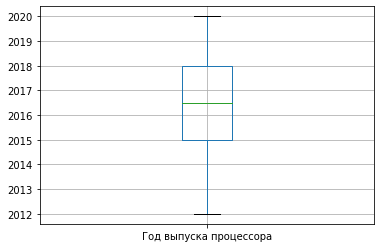

In [17]:
data.boxplot(num_cols[0])
None

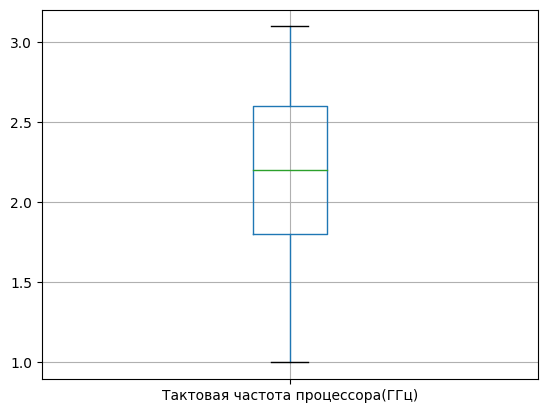

In [18]:
data.boxplot(num_cols[1])
None

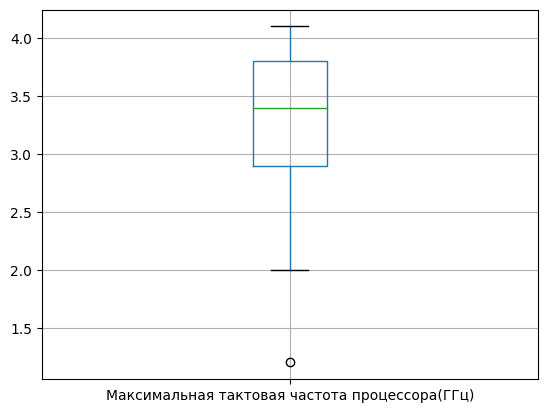

In [19]:
data.boxplot(num_cols[2])
None

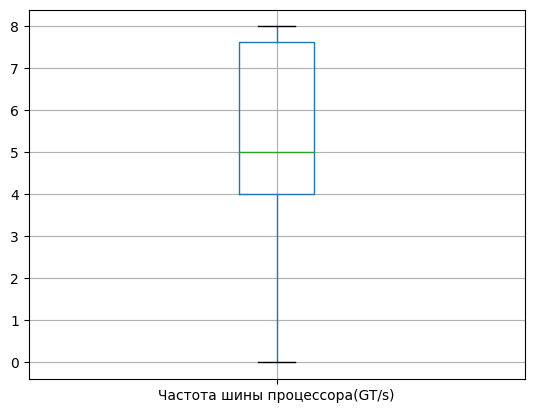

In [20]:
data.boxplot(num_cols[3])
None

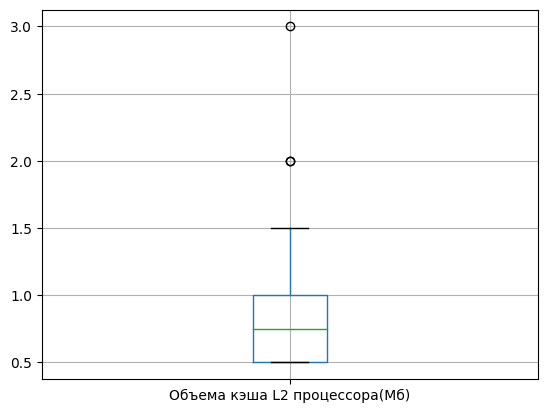

In [21]:
test = data.boxplot(num_cols[4], return_type='dict')
None

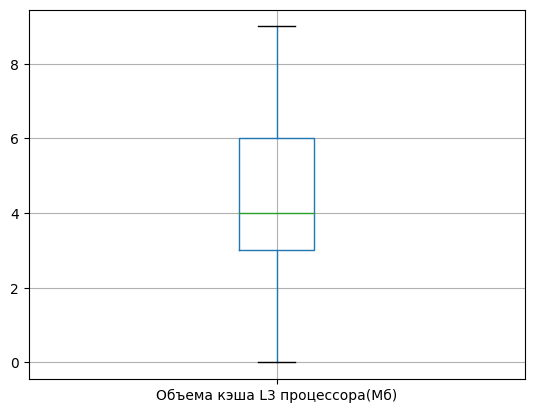

In [22]:
data.boxplot(num_cols[5])
None

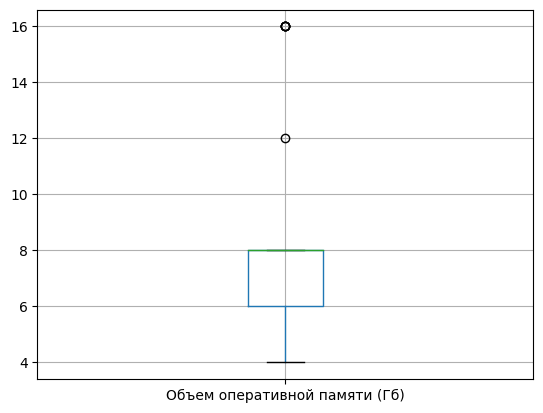

In [23]:
data.boxplot(column=num_cols[6])
None

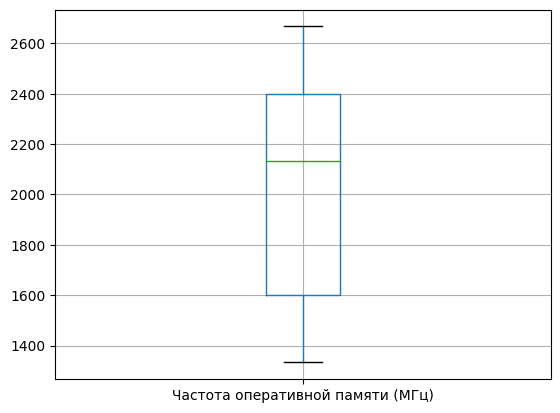

In [24]:
data.boxplot(column=num_cols[7])
None

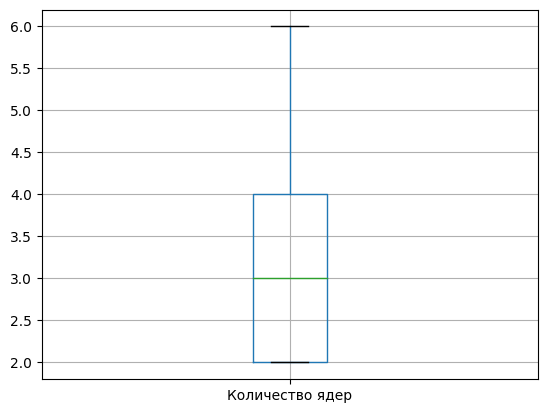

In [25]:
data.boxplot(num_cols[8])
None

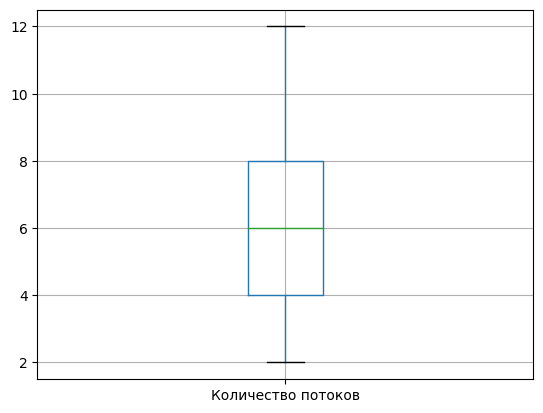

In [26]:
data.boxplot(num_cols[9])
None

In [27]:
def get_outlier(data, num_cols):
    res = {}
    for col in num_cols:
        q75, q25 = np.percentile(data[col], [75, 25])
        intr_qr = q75-q25
        top = q75+(1.5*intr_qr)
        low = q25-(1.5*intr_qr)
        out_arr = [data[data[col] > top].index.tolist()]
        out_arr.append(data[data[col] < low].index.tolist())
        res[col] = out_arr
    return res

In [28]:
get_outlier(data, num_cols)

{'Год выпуска процессора': [[], []],
 'Тактовая частота процессора(ГГц)': [[], []],
 'Максимальная тактовая частота процессора(ГГц)': [[], [27]],
 'Частота шины процессора(GT/s)': [[], []],
 'Объема кэша L2 процессора(Мб)': [[7, 17, 27], []],
 'Объема кэша L3 процессора(Мб)': [[], []],
 'Объем оперативной памяти (Гб)': [[0, 7, 11, 14, 18, 25], []],
 'Частота оперативной памяти (МГц)': [[], []],
 'Количество ядер': [[], []],
 'Количество потоков': [[], []]}

<AxesSubplot:>

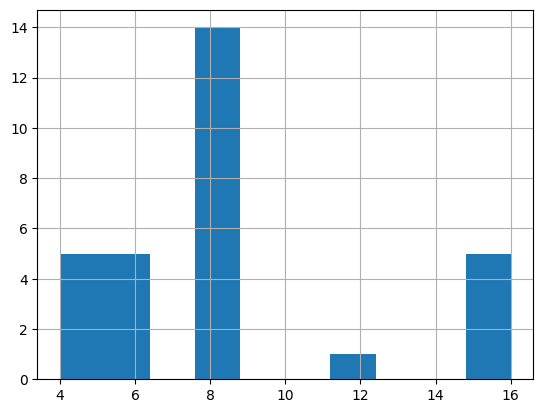

In [29]:
data['Объем оперативной памяти (Гб)'].hist()

In [30]:
data.loc[data['Объема кэша L3 процессора(Мб)'] == 0]['Объема кэша L3 процессора(Мб)']=np.NaN

In [31]:
data.columns

Index(['Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Количество ядер',
       'Количество потоков', 'Тип оперативной памяти',
       'Вид графического ускорителя', 'HDD', 'SSD',
       'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Год выпуска процессора                         30 non-null     int64  
 1   Тактовая частота процессора(ГГц)               30 non-null     float64
 2   Максимальная тактовая частота процессора(ГГц)  30 non-null     float64
 3   Частота шины процессора(GT/s)                  30 non-null     float64
 4   Объема кэша L2 процессора(Мб)                  30 non-null     float64
 5   Объема кэша L3 процессора(Мб)                  30 non-null     int64  
 6   Объем оперативной памяти (Гб)                  30 non-null     int64  
 7   Частота оперативной памяти (МГц)               30 non-null     int64  
 8   Количество ядер                                30 non-null     int64  
 9   Количество потоков                             30 non-nu

In [33]:
data = data.loc[(data['Частота шины процессора(GT/s)'] != 0) & (data['Объема кэша L3 процессора(Мб)'] != 0)]

In [34]:
num_cols

['Год выпуска процессора',
 'Тактовая частота процессора(ГГц)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объема кэша L2 процессора(Мб)',
 'Объема кэша L3 процессора(Мб)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Количество ядер',
 'Количество потоков']

In [35]:
data['Объем оперативной памяти (Гб)'] = (data['Объем оперативной памяти (Гб)'] // 8 > 0).astype(int)

<AxesSubplot:>

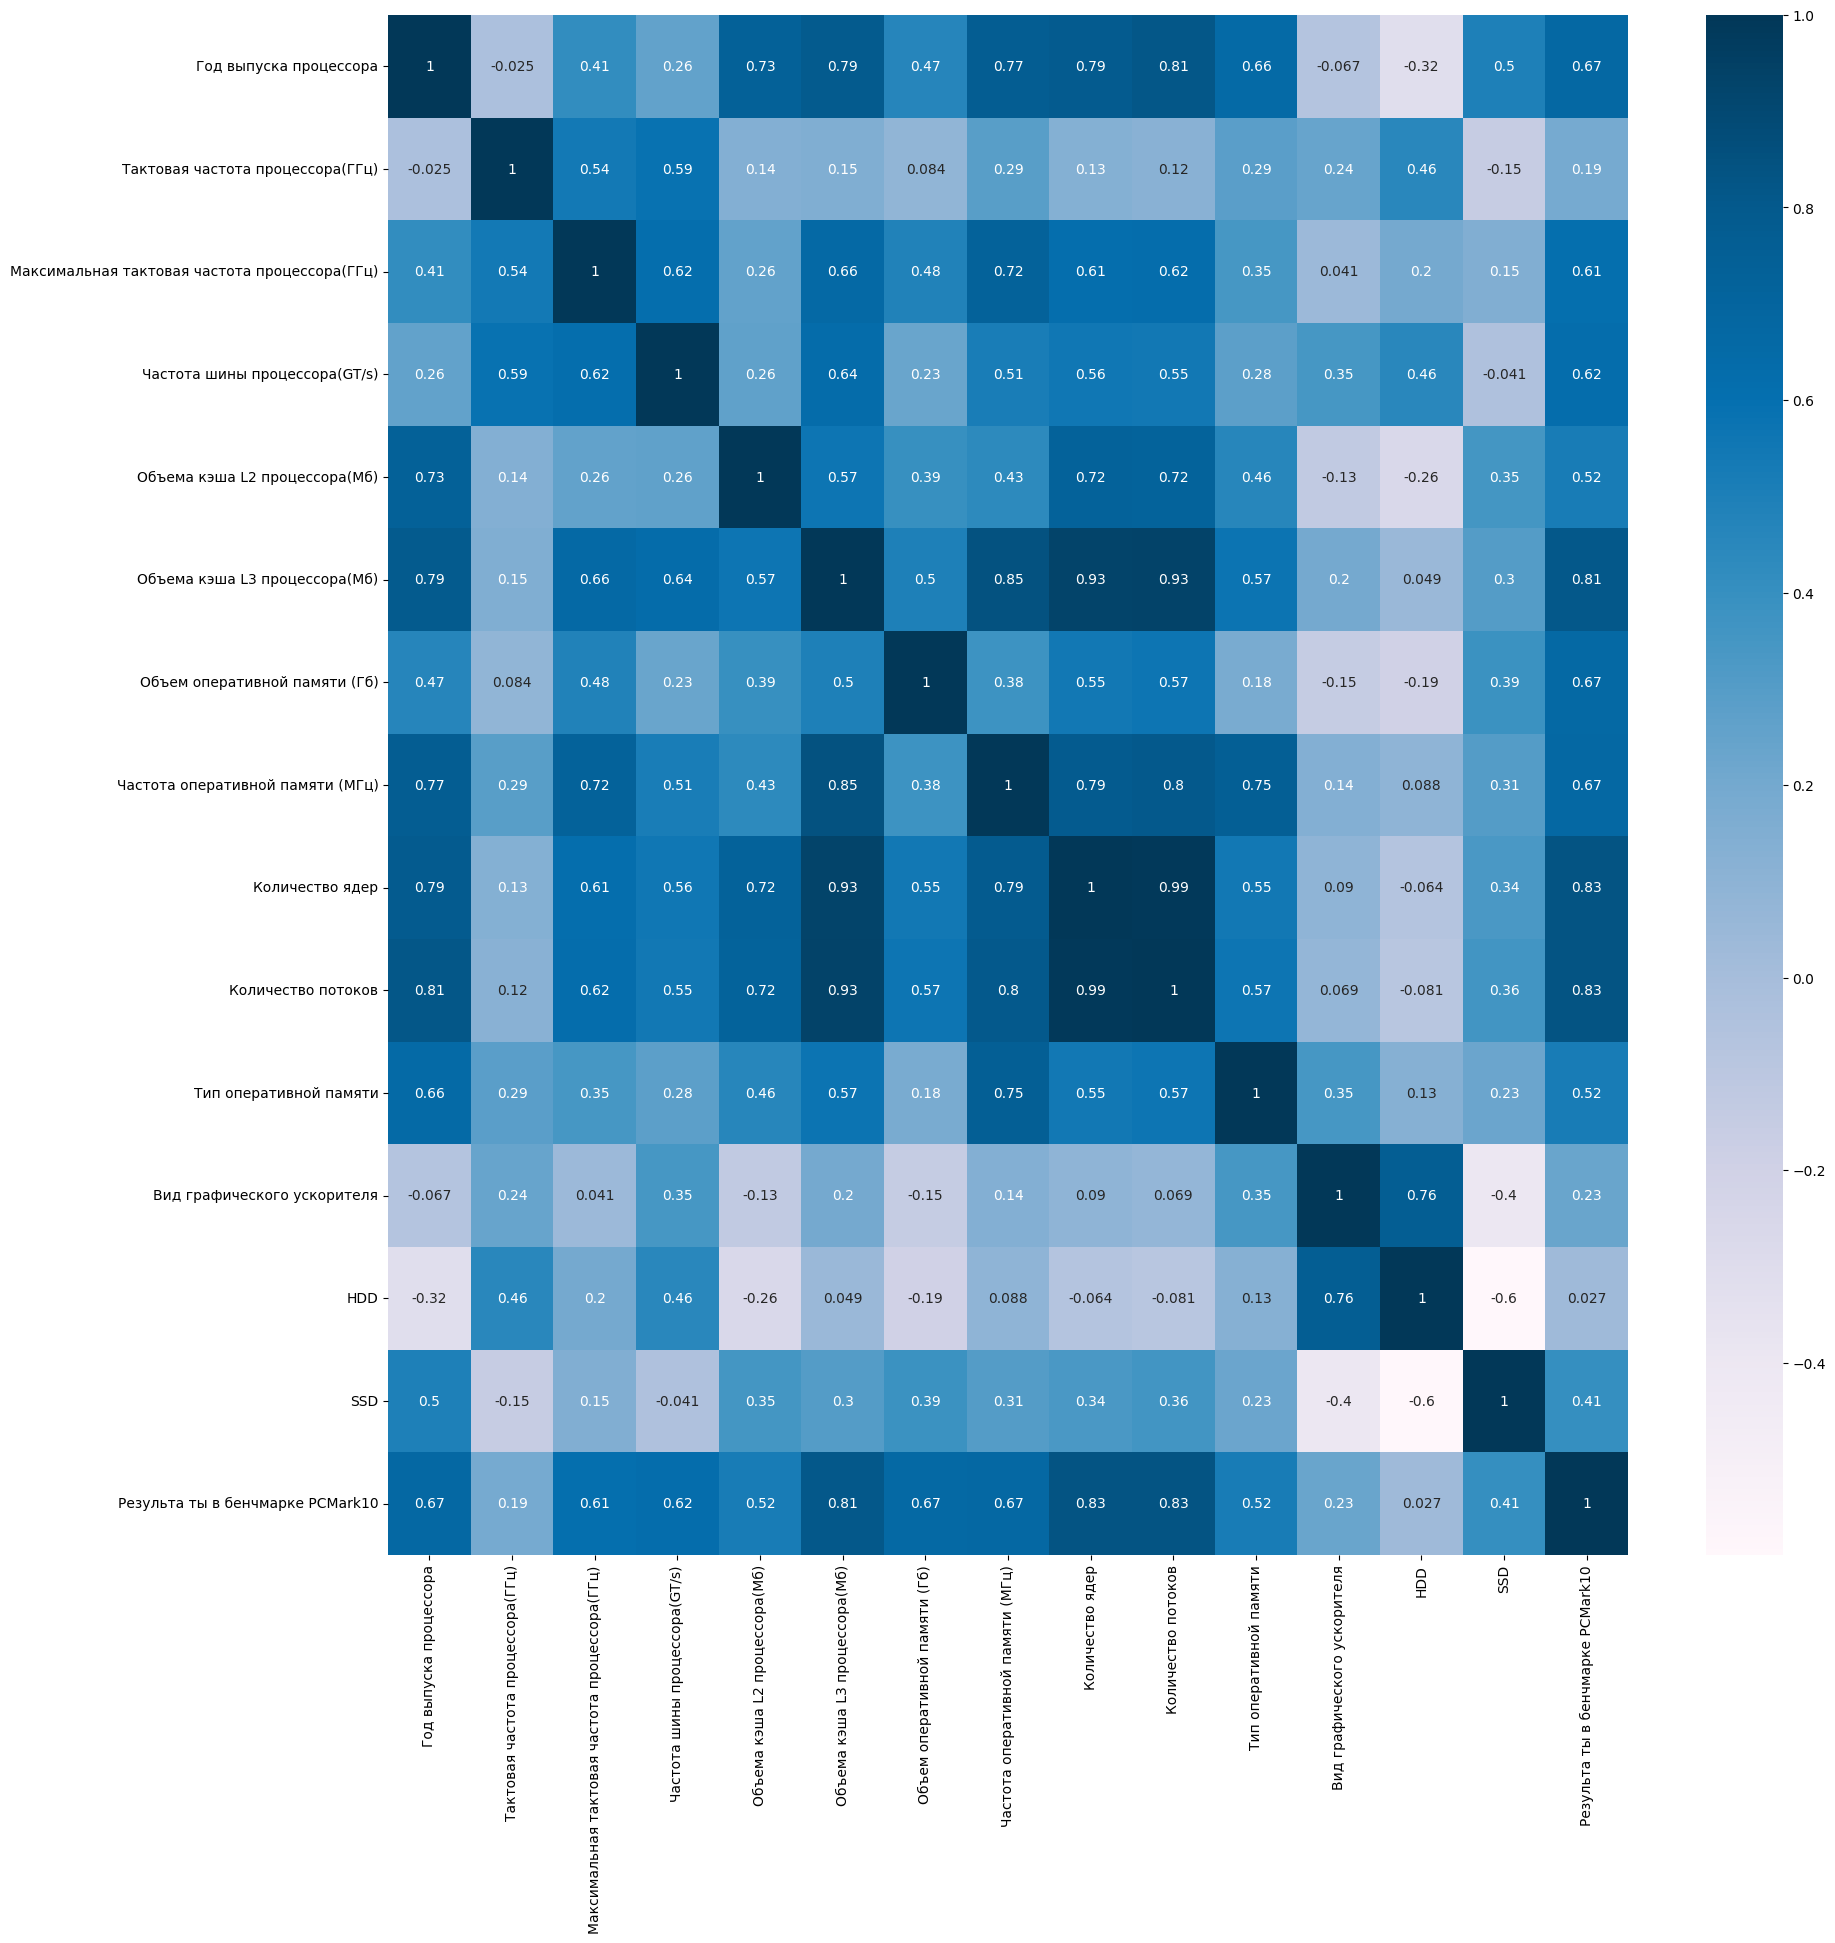

In [36]:
data
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap =plt.cm.PuBu)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Год выпуска процессора                         28 non-null     int64  
 1   Тактовая частота процессора(ГГц)               28 non-null     float64
 2   Максимальная тактовая частота процессора(ГГц)  28 non-null     float64
 3   Частота шины процессора(GT/s)                  28 non-null     float64
 4   Объема кэша L2 процессора(Мб)                  28 non-null     float64
 5   Объема кэша L3 процессора(Мб)                  28 non-null     int64  
 6   Объем оперативной памяти (Гб)                  28 non-null     int64  
 7   Частота оперативной памяти (МГц)               28 non-null     int64  
 8   Количество ядер                                28 non-null     int64  
 9   Количество потоков                             28 non-nu

In [38]:
data = data.drop(index=[7])

In [39]:
data.to_csv(r"data/tumtest__preprocessing.csv", index=False)

In [40]:
def get_std_coefs(X, y):
    res = [0]
    X_z = sm.add_constant(X.select_dtypes(include=[np.number]).dropna().apply(stats.zscore))
    Y_z = pd.DataFrame(y).apply(stats.zscore)
    model = sm.OLS(Y_z, X_z).fit()
    res.extend(model.params.tolist())
    return pd.Series(res)

In [41]:
def get_pivot(df, model, param, label, num):
    pivot_test = pd.DataFrame()
    predictors = model.params.index.tolist()
    n = len(predictors)
    i = np.ones(n).astype(int) * num
    pivot_test['id'] = pd.Series(i)
    pivot_test['predictors'] = predictors
    pivot_test['b'] = model.params.tolist()
    pivot_test['std_err'] = model.bse.tolist()
    influence = model.get_influence()
    pivot_test['std coef'] = get_std_coefs(df[param], df[label])
    pivot_test['t'] = model.tvalues.tolist()
    pivot_test['lower interval'] = model.conf_int(alpha=0.05)[:][0].tolist()
    pivot_test['upper interval'] = model.conf_int(alpha=0.05)[:][1].tolist()
    return pivot_test.set_index('id')

In [42]:
def test_model(test_model, bin1=4):
    standardized_residuals = pd.DataFrame(test_model.resid).apply(stats.zscore)
    plt.scatter(standardized_residuals,pd.DataFrame(data[label]).apply(stats.zscore))
    plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
    plt.xlabel("Регрессия Стандартизированный остаток")
    plt.ylabel("Регрессия Стандартизированное предсказанное значение")
    plt.show()
    
    plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
    plt.xlabel("Гистограмма Стандртизированный остаток")
    plt.ylabel("Частота")
    sns.distplot(standardized_residuals, bins = bin1)
    plt.show()

    print("Тест RESET Рамсея")
    ram = sm.stats.diagnostic.linear_reset(test_model, power = 2, use_f=True)
    
    print("df_num = ",ram.df_num,"df_denum = ", ram.df_denom, "Уровень значимости = ",ram.pvalue)
    # R^2
    print("\nR =",sqrt(test_model.rsquared))
    print("R^2 = ",test_model.rsquared)
    print("Cкорректированный R^2=",test_model.rsquared_adj)

    print("\nF - статистика = ",ram.fvalue)
    f_crit = stats.f.ppf(q = ram.pvalue, dfn = ram.df_num,dfd = ram.df_denom)
    print("F критическое =",f_crit)
    if ram.fvalue <f_crit:
        print("Так как F - статистика < критического значения (",f_crit,"), Модель правильно специфицирована")
    else:
        print("Так как F - статистика >= критического значения (",f_crit,"), Модель не правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    features = test_model.params.index.drop("const")
    vif["predictors"] = features
    vif ["VIF values"] = [variance_inflation_factor(data[features].values, i)
                          for i in range(len(features))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
    dw = sm.stats.stattools.durbin_watson(test_model.resid)
    print("\nЗначение критерия Дурбина - Уотсона: ", dw)
    if abs(4 - dw) < abs(2 - dw):
        print("Отрицательная автокорреляция")
    elif dw < abs(2 - dw):
        print("Положительная автокорреляция")
    else:
        print("Остатки независимы")
    #print(model.summary())
    sh = shapiro(test_model.resid)
    print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
    if sh.pvalue<0.05:
        print("Остатки не распределены нормально (p<0.05)")
    else:
        print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

In [43]:
label = 'Результа ты в бенчмарке PCMark10'

In [44]:
X_data = data.drop(label, axis=1)
Y_data = data.drop(X_data.columns, axis=1)

Y_stand = pd.DataFrame(data[label]).apply(stats.zscore)["Результа ты в бенчмарке PCMark10"]
X_stand = pd.DataFrame(data[{"Количество ядер","Объем оперативной памяти (Гб)","Тактовая частота процессора(ГГц)","Объема кэша L2 процессора(Мб)"}]).apply(stats.zscore)

Y = data[label]

In [45]:
predictors = data.drop(label, axis=1).to_dict()
sorted_predictors = sorted(predictors, key=lambda x: abs(data[x].corr(data[label])), reverse=True)

In [55]:
data[label]

0     3726
1     1846
2     1426
3     2586
4     2039
5     3659
6     1824
8     2561
9     3045
10    2869
11    4791
13    2951
14    4017
15    2174
16    2096
17    3472
18    3397
19    2730
20    1871
21    1933
22    2080
23    1922
24    3927
25    3651
26    3493
27    3460
28    1585
Name: Результа ты в бенчмарке PCMark10, dtype: int64

In [54]:
data.shape

(27, 15)

In [46]:
sorted_predictors

['Количество ядер',
 'Количество потоков',
 'Объема кэша L3 процессора(Мб)',
 'Год выпуска процессора',
 'Объема кэша L2 процессора(Мб)',
 'Частота оперативной памяти (МГц)',
 'Объем оперативной памяти (Гб)',
 'Частота шины процессора(GT/s)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Тип оперативной памяти',
 'SSD',
 'Вид графического ускорителя',
 'Тактовая частота процессора(ГГц)',
 'HDD']

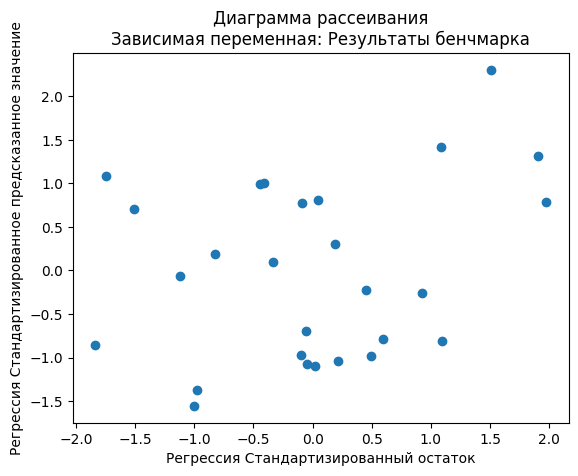

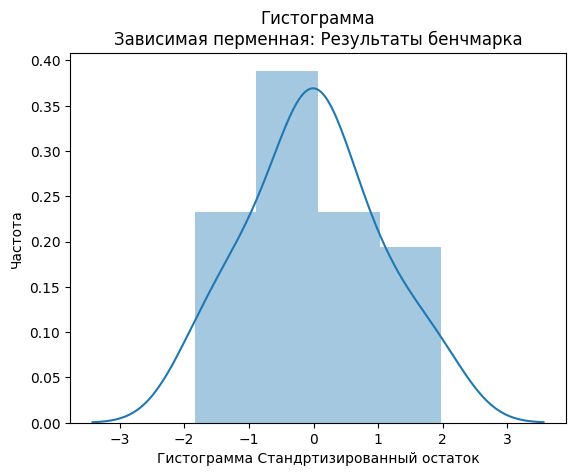

Тест RESET Рамсея
df_num =  1.0 df_denum =  19.0 Уровень значимости =  0.9062615604064804

R = 0.9616159947072758
R^2 =  0.9247053212768633
Cкорректированный R^2= 0.9021169176599223

F - статистика =  0.01424119180698976
F критическое = 3.113056261638041
Так как F - статистика < критического значения ( 3.113056261638041 ), Модель правильно специфицирована
                      predictors  VIF values
0                Количество ядер   18.821620
1  Объем оперативной памяти (Гб)    4.788900
2  Частота шины процессора(GT/s)   22.307348
3                            SSD    4.073450
4    Вид графического ускорителя    8.912419
5                            HDD   12.331374
Присутствует мульиколлинеарность

Значение критерия Дурбина - Уотсона:  2.0597453797708742
Остатки независимы

Значение критерия Шапиро 0.9761260747909546 Значение коэффициента p 0.7664579153060913
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [47]:
pred_list = []
Y = data[label]
pivot_df = pd.DataFrame()
i = 1
for predictor in sorted_predictors:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2
    if F_crit[predictor] < 3.84:
        pred_list.pop()
    else:
        remove_list = list(F_crit[F_crit <= 2.71].index)
        for el in remove_list:
            if el in pred_list:
                pred_list.remove(el)
    if len(pred_list) != 0:
        model_info = get_pivot(data, model, pred_list, label, i)
        pivot_df = pd.concat([pivot_df, model_info], axis=0)
        i += 1
test_model(model)

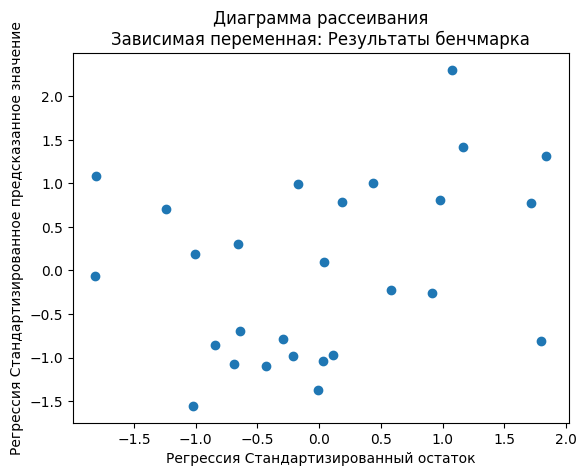

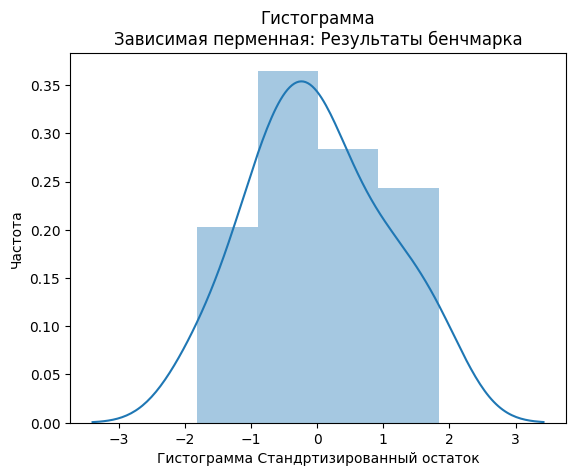

Тест RESET Рамсея
df_num =  1.0 df_denum =  21.0 Уровень значимости =  0.9386159135049297

R = 0.9494972465318685
R^2 =  0.9015450211715998
Cкорректированный R^2= 0.8836441159300725

F - статистика =  0.006074193891278686
F критическое = 3.9063884276451293
Так как F - статистика < критического значения ( 3.9063884276451293 ), Модель правильно специфицирована
                         predictors  VIF values
0                   Количество ядер    9.449850
1     Объем оперативной памяти (Гб)    4.577701
2  Тактовая частота процессора(ГГц)    5.786623
3                               SSD    2.821076
Мультиколлинеарность не присутствует

Значение критерия Дурбина - Уотсона:  1.9485279508252151
Остатки независимы

Значение критерия Шапиро 0.9696008563041687 Значение коэффициента p 0.5912989377975464
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [48]:
current_features = []
ignore_features = [label]
for i in range(4):
    function_dict = {'predictor': [], 'r-squared':[]}
    for predictor in sorted_predictors:
        if predictor not in (current_features+ignore_features):
            selected_X = data[current_features + [predictor]]
            model = sm.OLS(Y, sm.add_constant(selected_X)).fit()
            F_crit = model.tvalues ** 2
            #print(predictor, F_crit[predictor])
            if F_crit[predictor]>=3.84:
                #We add the predictor to our model
                #Now, we check if any other predictor's F is <2.71 and if so we drop em out
                remove_list = list(F_crit[F_crit <= 2.71].index)
                for el in remove_list:
                    if el in selected_X.columns:
                        selected_X.drop(el)
                model = sm.OLS(Y,sm.add_constant(selected_X)).fit()
                if len(model.params)>=3:
                    #Check the VIF
                    vif = pd.DataFrame()
                    vif["predictors"] = selected_X.columns
                    vif ["VIF values"] = [variance_inflation_factor(selected_X.values, i)
                    for i in range(len(selected_X.columns))]
                    if max(vif["VIF values"])<=10:
                        y_preds = model.predict(sm.add_constant(selected_X))
                        #Add the column name to our dictionary
                        function_dict['predictor'].append(predictor)
                        #Calculate the r-squared value between the target and predicted target
                        r2 = np.corrcoef(Y, y_preds)[0, 1]**2
                        #Add the r-squared value to our dictionary
                        function_dict['r-squared'].append(r2)
                else:
                    y_preds = model.predict(sm.add_constant(selected_X))
                    #Add the column name to our dictionary
                    function_dict['predictor'].append(predictor)
                    #Calculate the r-squared value between the target and predicted target
                    r2 = np.corrcoef(Y, y_preds)[0, 1]**2
                    #Add the r-squared value to our dictionary
                    function_dict['r-squared'].append(r2)
    if len(function_dict['predictor'])>0:
        #Once it's iterated through every column, turn our dict into a sorted DataFrame
        function_df = pd.DataFrame(function_dict).sort_values(by=['r-squared'],ascending = False)
        current_features.append(function_df["predictor"][0])
model = sm.OLS(Y, sm.add_constant(data[current_features])).fit()

test_model(model)

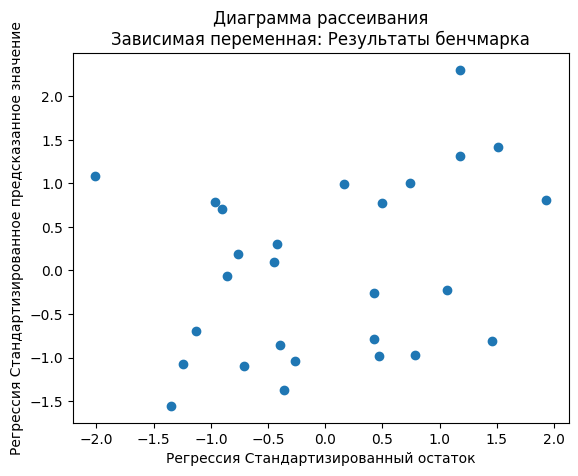

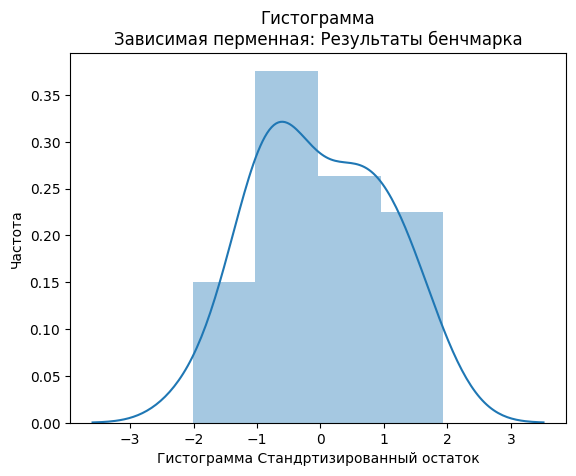

Тест RESET Рамсея
df_num =  1.0 df_denum =  21.0 Уровень значимости =  0.9436701200893195

R = 0.9497540555124779
R^2 =  0.902032765962399
Cкорректированный R^2= 0.8842205415919261

F - статистика =  0.005113392505885327
F критическое = 4.080175991850006
Так как F - статистика < критического значения ( 4.080175991850006 ), Модель правильно специфицирована
                         predictors  VIF values
0     Объема кэша L2 процессора(Мб)    8.440850
1  Тактовая частота процессора(ГГц)    5.789521
2     Объем оперативной памяти (Гб)    4.307289
3                   Количество ядер   15.692078
Присутствует мульиколлинеарность

Значение критерия Дурбина - Уотсона:  1.7454276062179792
Остатки независимы

Значение критерия Шапиро 0.9712312817573547 Значение коэффициента p 0.6346248388290405
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [49]:
model = sm.OLS(Y, sm.add_constant(data[{"Объема кэша L2 процессора(Мб)","Количество ядер","Объем оперативной памяти (Гб)","Тактовая частота процессора(ГГц)"}])).fit()
test_model (model)

### Тест модели из стековерфлов

In [50]:
X = X_data
y = Y_data

In [51]:
X.shape

(27, 14)

In [52]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

# data = load_boston()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            print(new_pval.index[best_feature])
            included.append(new_pval.index[best_feature])
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        # print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Количество ядер
Add                               4 with p-value 2.44371e-10
Объем оперативной памяти (Гб)
Add                               3 with p-value 0.0115454
Тактовая частота процессора(ГГц)
Add                               5 with p-value 0.0200494
Объема кэша L2 процессора(Мб)
Add                               0 with p-value 0.0486453
resulting features:
['Количество ядер', 'Объем оперативной памяти (Гб)', 'Тактовая частота процессора(ГГц)', 'Объема кэша L2 процессора(Мб)']


In [53]:
par = 

SyntaxError: invalid syntax (3118411796.py, line 1)

In [ ]:
model.params

const                               -35.397215
Объем оперативной памяти (Гб)       427.696496
Количество ядер                     445.951950
Тактовая частота процессора(ГГц)    371.629377
Объема кэша L2 процессора(Мб)       388.915553
dtype: float64

In [ ]:
pd.DataFrame(Y - model.predict(sm.add_constant(X[result]))).apply(stats.zscore)

,0
0,-1.921071
1,0.509165
2,0.070070
3,0.955129
4,0.260304
5,-0.327077
6,0.575628
7,-3.032900
8,0.945331
9,-0.634947


In [ ]:
def test_model(test_model, bin1=4):
    standardized_residuals = pd.DataFrame(test_model.resid).apply(stats.zscore)
    plt.scatter(test_model.resid,pd.DataFrame(data[label]).apply(stats.zscore))
    plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
    plt.xlabel("Регрессия Стандартизированный остаток")
    plt.ylabel("Регрессия Стандартизированное предсказанное значение")
    plt.show()
    
    plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
    plt.xlabel("Гистограмма Стандртизированный остаток")
    plt.ylabel("Частота")
    plt.hist(standardized_residuals, bins = bin1)
    plt.show()

    print("Тест RESET Рамсея")
    ram = sm.stats.diagnostic.linear_reset(test_model, power = 2, use_f=True)
    
    print("df_num = ",ram.df_num,"df_denum = ", ram.df_denom, "Уровень значимости = ",ram.pvalue)
    # R^2
    print("\nR =",sqrt(test_model.rsquared))
    print("R^2 = ",test_model.rsquared)
    print("Cкорректированный R^2=",test_model.rsquared_adj)

    print("\nF - статистика = ",ram.fvalue)
    f_crit = stats.f.ppf(q = ram.pvalue, dfn = ram.df_num,dfd = ram.df_denom)
    print("F критическое =",f_crit)
    if ram.fvalue <f_crit:
        print("Так как F - статистика < критического значения (",f_crit,"), Модель правильно специфицирована")
    else:
        print("Так как F - статистика >= критического значения (",f_crit,"), Модель не правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    features = test_model.params.index.drop("const")
    vif["predictors"] = features
    vif ["VIF values"] = [variance_inflation_factor(data[features].values, i)
                          for i in range(len(features))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
    dw = sm.stats.stattools.durbin_watson(test_model.resid)
    print("\nЗначение критерия Дурбина - Уотсона: ", dw)
    if abs(4 - dw) < abs(2 - dw):
        print("Отрицательная автокорреляция")
    elif dw < abs(2 - dw):
        print("Положительная автокорреляция")
    else:
        print("Остатки независимы")
    #print(model.summary())
    sh = shapiro(test_model.resid)
    print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
    if sh.pvalue<0.05:
        print("Остатки не распределены нормально (p<0.05)")
    else:
        print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

In [ ]:
plt.scatter(test_model.resid,pd.DataFrame(data[label]).apply(stats.zscore))

AttributeError: 'function' object has no attribute 'resid'

In [ ]:
def test_model(test_model, bin1=4):
    standardized_residuals = pd.DataFrame(test_model.resid).apply(stats.zscore)
    plt.scatter(standardized_residuals,pd.DataFrame(data[label]).apply(stats.zscore))
    plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
    plt.xlabel("Регрессия Стандартизированный остаток")
    plt.ylabel("Регрессия Стандартизированное предсказанное значение")
    plt.show()
    
    plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
    plt.xlabel("Гистограмма Стандртизированный остаток")
    plt.ylabel("Частота")
    sns.distplot(standardized_residuals, bins = bin1)
    plt.show()

    print("Тест RESET Рамсея")
    ram = sm.stats.diagnostic.linear_reset(test_model, power = 2, use_f=True)
    
    print("df_num = ",ram.df_num,"df_denum = ", ram.df_denom, "Уровень значимости = ",ram.pvalue)
    # R^2
    print("\nR =",sqrt(test_model.rsquared))
    print("R^2 = ",test_model.rsquared)
    print("Cкорректированный R^2=",test_model.rsquared_adj)

    print("\nF - статистика = ",ram.fvalue)
    f_crit = stats.f.ppf(q = ram.pvalue, dfn = ram.df_num,dfd = ram.df_denom)
    print("F критическое =",f_crit)
    if ram.fvalue <f_crit:
        print("Так как F - статистика < критического значения (",f_crit,"), Модель правильно специфицирована")
    else:
        print("Так как F - статистика >= критического значения (",f_crit,"), Модель не правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    features = test_model.params.index.drop("const")
    vif["predictors"] = features
    vif ["VIF values"] = [variance_inflation_factor(data[features].values, i)
                          for i in range(len(features))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
    dw = sm.stats.stattools.durbin_watson(test_model.resid)
    print("\nЗначение критерия Дурбина - Уотсона: ", dw)
    if abs(4 - dw) < abs(2 - dw):
        print("Отрицательная автокорреляция")
    elif dw < abs(2 - dw):
        print("Положительная автокорреляция")
    else:
        print("Остатки независимы")
    #print(model.summary())
    sh = shapiro(test_model.resid)
    print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
    if sh.pvalue<0.05:
        print("Остатки не распределены нормально (p<0.05)")
    else:
        print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

In [ ]:
np.array(Y - model.predict(sm.add_constant(X[result]))).mean()

45.97670037453426

In [ ]:
np.mean(np.array[Y - model.predict(sm.add_constant(X[result]))])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
model.params

const                               -35.397215
Объем оперативной памяти (Гб)       427.696496
Количество ядер                     445.951950
Тактовая частота процессора(ГГц)    371.629377
Объема кэша L2 процессора(Мб)       388.915553
dtype: float64

In [ ]:
s = range(-2, 3, 1)

In [ ]:
standardized_residuals = pd.DataFrame(model.resid).apply(stats.zscore)

In [ ]:
s = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

In [ ]:
model.params

const                               -35.397215
Объем оперативной памяти (Гб)       427.696496
Количество ядер                     445.951950
Тактовая частота процессора(ГГц)    371.629377
Объема кэша L2 процессора(Мб)       388.915553
dtype: float64

(array([1., 1., 0., 4., 7., 8., 7., 2.]),
 array([-3.03290035, -2.43855167, -1.84420298, -1.2498543 , -0.65550561,
        -0.06115693,  0.53319175,  1.12754044,  1.72188912]),
 <BarContainer object of 8 artists>)

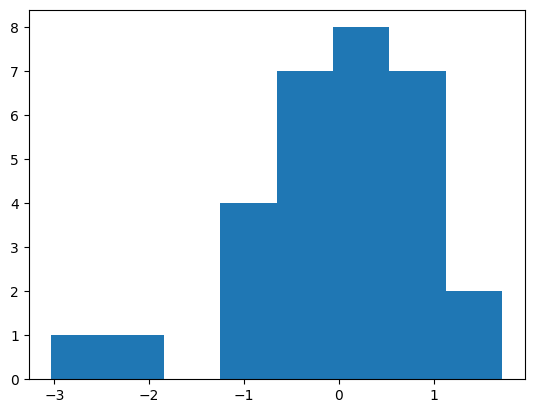

In [ ]:
plt.hist(pd.DataFrame(Y - model.predict(sm.add_constant(X[result]))).apply(stats.zscore).to_numpy(), bins=8)

In [ ]:
pd.DataFrame(Y).apply(stats.zscore).to_numpy() - pd.DataFrame(model.predict(sm.add_constant(X[result]))).apply(stats.zscore).to_numpy()

array([[-0.69761904],
       [-0.37255748],
       [-0.35129428],
       [ 0.33867962],
       [-0.10559128],
       [ 0.18619046],
       [-0.16925286],
       [ 0.12719492],
       [-0.15206693],
       [-0.12531189],
       [ 0.28416447],
       [-0.25983096],
       [ 0.41378687],
       [-0.36217789],
       [ 0.18828098],
       [-0.3693932 ],
       [-0.34270317],
       [-0.27403104],
       [-0.02395882],
       [ 0.32135565],
       [ 0.53558626],
       [ 0.21733294],
       [ 0.31060854],
       [-0.005805  ],
       [ 0.60069188],
       [ 0.11961581],
       [-0.03189454]])

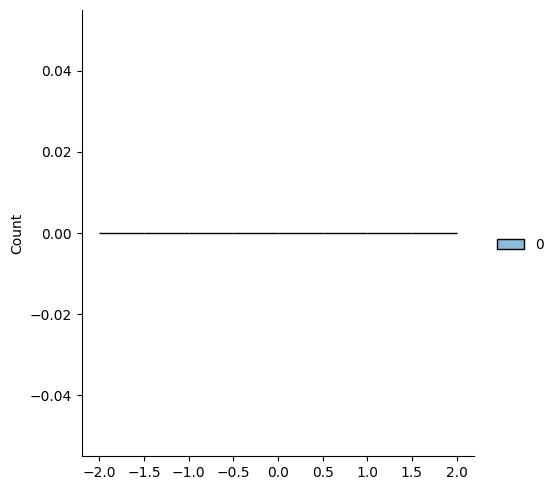

In [ ]:
sns.displot(pd.DataFrame(Y).apply(stats.zscore).to_numpy() - pd.DataFrame(model.predict(sm.add_constant(X[result]))), bins=s)

0    -457.233892
1    -320.501320
2    -331.712307
3     308.009867
4     -90.338382
5     256.833224
6    -156.689933
8     134.358116
9     -59.863274
10    -50.051888
11    413.308332
13   -153.863274
14    466.181473
15   -289.804821
16    152.473004
17   -207.593516
18   -190.981465
19   -180.405498
20    -35.364058
21    249.613568
22    433.776506
23    164.287693
24    376.181473
25    100.181473
Name: Результа ты в бенчмарке PCMark10, dtype: float64

In [ ]:
test_data  = pd.read_csv('data/tumanova.csv')

In [ ]:
label

'Результа ты в бенчмарке PCMark10'

In [ ]:
test_data[label] 

0     3726
1     1846
2     1426
3     2586
4     2039
5     3659
6     1824
7     2868
8     2561
9     3045
10    2869
11    4791
12    1862
13    2951
14    4017
15    2174
16    2096
17    3472
18    3397
19    2730
20    1871
21    1933
22    2080
23    1922
24    3927
25    3651
26    3493
27    3460
28    1585
29    2568
Name: Результа ты в бенчмарке PCMark10, dtype: int64

In [ ]:
model.predict(sm.add_constant(test_data[result]))

0     10872.513145
1      5288.164971
2      4433.424008
3      5399.653784
4      5251.002033
5      6523.830428
6      4656.401635
7     11947.647753
8      5548.305535
9      6226.526926
10     5594.763589
11    11066.970922
12     4144.770199
13     6226.526926
14     8456.289979
15     5585.468473
16     4619.238697
17     6801.257167
18    10277.260718
19     6032.069149
20     3690.171859
21     3467.194233
22     4321.935195
23     3541.520108
24     6672.482179
25    10240.097780
26     6032.069149
27     6392.464852
28     3430.031295
29     5742.763312
dtype: float64

In [ ]:
Y - model.predict(sm.add_constant(test_data[result]))

0    -7146.513145
1    -3442.164971
2    -3007.424008
3    -2813.653784
4    -3212.002033
5    -2864.830428
6    -2832.401635
7             NaN
8    -2987.305535
9    -3181.526926
10   -2725.763589
11   -6275.970922
12            NaN
13   -3275.526926
14   -4439.289979
15   -3411.468473
16   -2523.238697
17   -3329.257167
18   -6880.260718
19   -3302.069149
20   -1819.171859
21   -1534.194233
22   -2241.935195
23   -1619.520108
24   -2745.482179
25   -6589.097780
26   -2539.069149
27   -2932.464852
28   -1845.031295
29            NaN
dtype: float64

In [ ]:
test_data[label] - model.predict(sm.add_constant(test_data[result])).to_numpy()

0    -7146.513145
1    -3442.164971
2    -3007.424008
3    -2813.653784
4    -3212.002033
5    -2864.830428
6    -2832.401635
7    -9079.647753
8    -2987.305535
9    -3181.526926
10   -2725.763589
11   -6275.970922
12   -2282.770199
13   -3275.526926
14   -4439.289979
15   -3411.468473
16   -2523.238697
17   -3329.257167
18   -6880.260718
19   -3302.069149
20   -1819.171859
21   -1534.194233
22   -2241.935195
23   -1619.520108
24   -2745.482179
25   -6589.097780
26   -2539.069149
27   -2932.464852
28   -1845.031295
29   -3174.763312
Name: Результа ты в бенчмарке PCMark10, dtype: float64

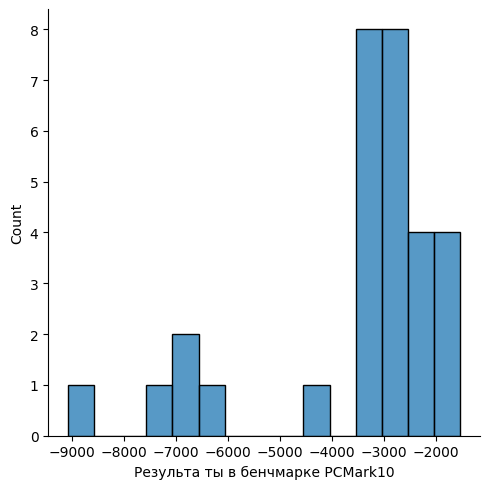

In [ ]:
sns.displot()

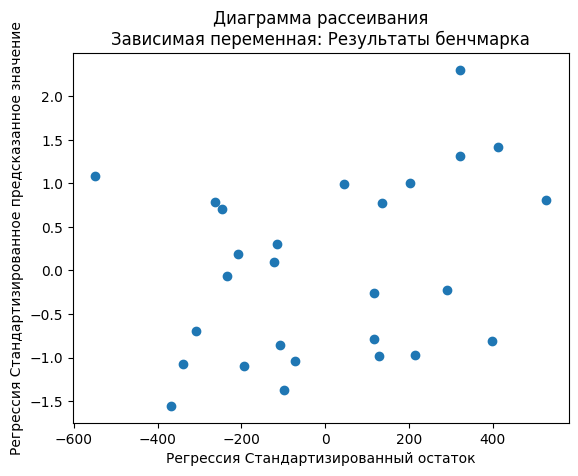

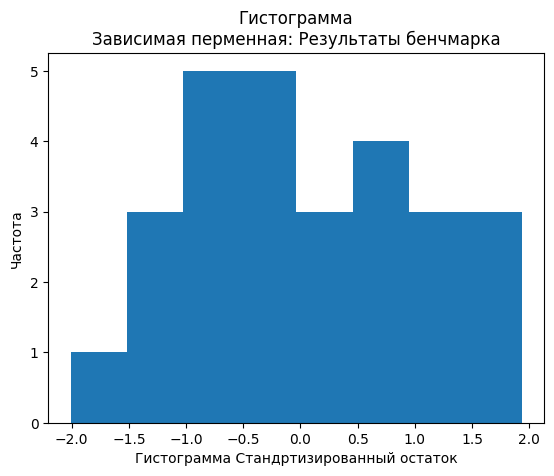

Тест RESET Рамсея
df_num =  1.0 df_denum =  21.0 Уровень значимости =  0.9436701203024364

R = 0.9497540555124779
R^2 =  0.902032765962399
Cкорректированный R^2= 0.8842205415919261

F - статистика =  0.0051133924671278195
F критическое = 4.080175999549102
Так как F - статистика < критического значения ( 4.080175999549102 ), Модель правильно специфицирована
                         predictors  VIF values
0     Объем оперативной памяти (Гб)    4.307289
1                   Количество ядер   15.692078
2  Тактовая частота процессора(ГГц)    5.789521
3     Объема кэша L2 процессора(Мб)    8.440850
Присутствует мульиколлинеарность

Значение критерия Дурбина - Уотсона:  1.7454276062179808
Остатки независимы

Значение критерия Шапиро 0.9712312817573547 Значение коэффициента p 0.6346248388290405
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [ ]:
test_model(model, 8)